In [1]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import zipfile
import tempfile
import io
import os

In [2]:
df = pd.read_csv("/home/onyxia/work/Projet-de-Statapp---WFP-/SPI.csv", sep=";")
data = pd.read_csv("/home/onyxia/work/Projet-de-Statapp---WFP-/NIGERIA_WFP_ENGINEERED.csv")

In [3]:
meta = {
    "staticDownloadLink": "https://github.com/wmgeolab/geoBoundaries/raw/9469f09/releaseData/gbOpen/NGA/ADM1/geoBoundaries-NGA-ADM1-all.zip"
}

zip_url = meta["staticDownloadLink"]

r = requests.get(zip_url)
z = zipfile.ZipFile(io.BytesIO(r.content))

with tempfile.TemporaryDirectory() as tmpdir:
    z.extractall(tmpdir)

    shp_path = None
    for root, dirs, files in os.walk(tmpdir):
        for f in files:
            if f.endswith(".shp"):
                shp_path = os.path.join(root, f)
    nigeria_adm1 = gpd.read_file(shp_path)

print(nigeria_adm1)

                          shapeName shapeISO                  shapeID  \
0                       Cross River    NG-CR  27671186B81745654473385   
1   Abuja Federal Capital Territory    NG-FC  27671186B76269877687363   
2                              Ogun    NG-OG  27671186B83907961412659   
3                               Oyo    NG-OY  27671186B56513237316251   
4                            Sokoto    NG-SO  27671186B99510750195830   
5                           Zamfara    NG-ZA  27671186B21163522287660   
6                             Lagos    NG-LA  27671186B19119389308001   
7                         Akwa Ibom    NG-AK  27671186B25346211366833   
8                           Bayelsa    NG-BY  27671186B47021609715037   
9                              Ondo    NG-ON  27671186B41407594687181   
10                            Delta    NG-DE  27671186B69086015704361   
11                           Rivers    NG-RI  27671186B95832466049157   
12                            Kwara    NG-KW   2767

In [4]:
nigeria_adm1["shapeName"] = nigeria_adm1["shapeName"].replace(
    "Abuja Federal Capital Territory",
    "Abuja"
)

In [5]:
north = [
    "Sokoto","Zamfara","Kebbi","Katsina","Kano","Jigawa",
    "Yobe","Borno","Bauchi","Gombe","Kaduna"
]

center = [
    "Niger","Kwara","Kogi","Plateau","Nasarawa",
    "Benue","Taraba","Adamawa","Abuja"
]

def classify_region(state):
    if state in north:
        return "North"
    elif state in center:
        return "Center"
    else:
        return "South"

nigeria_adm1["Region"] = nigeria_adm1["shapeName"].apply(classify_region)

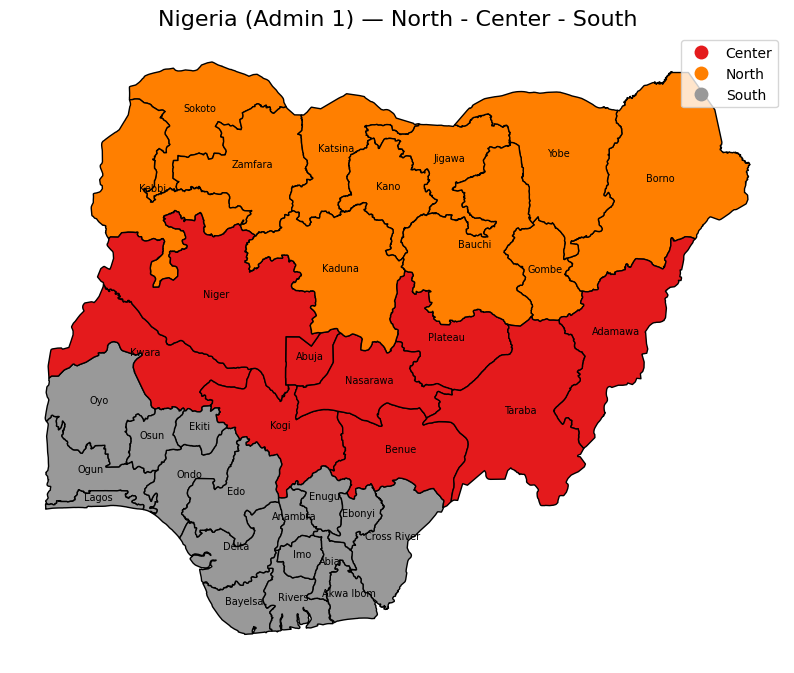

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))

nigeria_adm1.plot(
    ax=ax,
    column="Region",
    categorical=True,
    legend=True,
    edgecolor="black",
    cmap="Set1"
)

# Ajouter les noms des États
for idx, row in nigeria_adm1.iterrows():
    ax.text(row.geometry.centroid.x,
            row.geometry.centroid.y,
            row["shapeName"],
            fontsize=7,
            ha='center')

ax.set_title("Nigeria (Admin 1) — North - Center - South", fontsize=16)
ax.axis("off")

plt.show()

In [ ]:
df.head()

0          Abia
1          Abia
2          Abia
3          Abia
4          Abia
         ...   
1327    Zamfara
1328    Zamfara
1329    Zamfara
1330    Zamfara
1331    Zamfara
Name: State, Length: 1332, dtype: object

In [18]:
data.head()

,time,NAME_1,inadequate,bnds,Y,X,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,...,vim_lag1,vim_lag3,vim_lag6,viq_roll3m_mean,viq_roll6m_mean,viq_lag1,viq_lag3,viq_lag6,target_plus_1m,target_plus_3m
0,2023-01-01,Abia,0.296774,0.5,5.395,7.471889,0.000016,385.566324,-71.064699,99941.271400,...,0.569790,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.401515,0.300613
1,2023-02-01,Abia,0.401515,0.5,5.395,7.471889,0.000014,392.934595,-69.757725,99864.297600,...,0.569790,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.281046,0.226667
2,2023-03-01,Abia,0.281046,0.5,5.395,7.471889,0.000026,408.719824,-44.999965,99913.329933,...,0.598635,0.569790,0.56979,101.348943,101.662204,100.31283,101.51092,101.51092,0.300613,0.263514
3,2023-04-01,Abia,0.300613,0.5,5.395,7.471889,0.000030,416.609924,-39.776577,99798.052400,...,0.683211,0.569790,0.56979,101.348943,101.662204,102.22308,101.51092,101.51092,0.226667,0.412903
4,2023-05-01,Abia,0.226667,0.5,5.395,7.471889,0.000039,419.145751,-35.249339,99990.250067,...,0.751135,0.598635,0.56979,101.623837,101.662204,102.33560,100.31283,101.51092,0.263514,0.335443


In [7]:
data["time"] = pd.to_datetime(data["time"])
data["Year"]=data["time"].dt.year

In [19]:
data.head()

,time,NAME_1,inadequate,bnds,Y,X,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,...,vim_lag3,vim_lag6,viq_roll3m_mean,viq_roll6m_mean,viq_lag1,viq_lag3,viq_lag6,target_plus_1m,target_plus_3m,Year
0,2023-01-01,Abia,0.296774,0.5,5.395,7.471889,0.000016,385.566324,-71.064699,99941.271400,...,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.401515,0.300613,2023
1,2023-02-01,Abia,0.401515,0.5,5.395,7.471889,0.000014,392.934595,-69.757725,99864.297600,...,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.281046,0.226667,2023
2,2023-03-01,Abia,0.281046,0.5,5.395,7.471889,0.000026,408.719824,-44.999965,99913.329933,...,0.569790,0.56979,101.348943,101.662204,100.31283,101.51092,101.51092,0.300613,0.263514,2023
3,2023-04-01,Abia,0.300613,0.5,5.395,7.471889,0.000030,416.609924,-39.776577,99798.052400,...,0.569790,0.56979,101.348943,101.662204,102.22308,101.51092,101.51092,0.226667,0.412903,2023
4,2023-05-01,Abia,0.226667,0.5,5.395,7.471889,0.000039,419.145751,-35.249339,99990.250067,...,0.598635,0.56979,101.623837,101.662204,102.33560,100.31283,101.51092,0.263514,0.335443,2023


In [14]:
df["State"] = df["State"].replace("Nasarawa", "Nassarawa")

In [15]:
df[df["State"]=="Nassarawa"].head()

,Unnamed: 0,State,month,SPI_Cum1,SPI_Cum3,SPI_Cum6,year
300,301,Nassarawa,1,-0.2695,-1.6675,-1.6495,2023
301,302,Nassarawa,2,-0.1100,-1.0350,0.0145,2023
302,303,Nassarawa,3,-0.3240,-0.6620,0.8010,2023
303,304,Nassarawa,4,-1.0355,-1.3315,-1.6745,2023
304,305,Nassarawa,5,0.8925,-0.0950,-0.1985,2023


In [16]:
data_merge = pd.merge(data, df, left_on=["NAME_1", "month", "Year"], right_on=["State","month", "year"])

In [17]:
data_merge.shape[0]==data.shape[0]

True

In [29]:
data_merge.to_csv("Data_with_CSV_Thierno.csv",index=False)

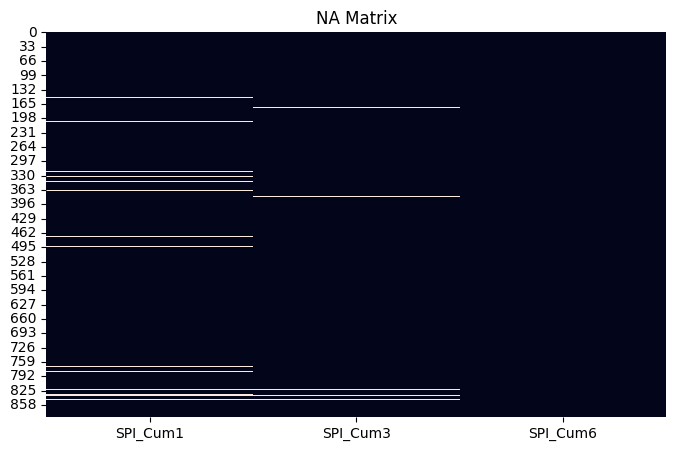

In [18]:
plt.figure(figsize=(8,5))
sns.heatmap(data_merge[["SPI_Cum1","SPI_Cum3","SPI_Cum6"]].isna(), cbar=False)
plt.title("NA Matrix")
plt.show()


In [19]:
data_merge.groupby("State")[["SPI_Cum1","SPI_Cum3","SPI_Cum6","inadequate"]].describe()

SPI_Cum1                                                    \
               count      mean       std       min       25%       50%   
State                                                                    
Abia            32.0 -0.788219  0.996548 -2.470000 -1.796500 -0.678000   
Abuja           32.0 -0.339242  1.163253 -3.018250 -0.957688 -0.236250   
Adamawa         32.0 -0.001953  0.931218 -1.376000 -0.682750 -0.052500   
Akwa Ibom       32.0 -0.572263  0.862940 -2.874000 -1.140688 -0.502125   
Bauchi          27.0 -0.461673  1.665328 -5.660667 -1.261667  0.039333   
Benue           32.0 -0.459417  0.719964 -1.823000 -0.862417 -0.381667   
Borno           26.0  0.425263  0.943366 -1.142000 -0.308321  0.219143   
Cross River     32.0 -0.601016  0.757042 -1.834000 -1.207750 -0.412750   
Edo             32.0 -0.764625  1.114635 -3.604500 -1.560750 -0.782750   
Enugu           32.0 -0.807312  1.149993 -3.781000 -1.580000 -0.706500   
Gombe           26.0 -0.463308  1.817178 -7.483000 -0.746500 -0.385000   
Jigawa          27.0  0.417574  1.352815 -1.806000 -0.327583  0.458667   
Kaduna          32.0 -0.288914  1.040954 -3.130250 -0.657375 -0.365625   
Kano            32.0  0.416328  1.676193 -3.361500 -0.350125  0.150500   
Katsina         27.0  0.581278  1.038275 -2.641500  0.087750  0.284500   
Kebbi           29.0  0.329592  1.022633 -1.262000 -0.228333  0.105667   
Kogi            32.0 -0.445010  1.010565 -2.465333 -0.962750 -0.496000   
Kwara           32.0  0.157641  1.030556 -2.164000 -0.532375  0.196500   
Lagos           32.0  0.116219  0.879151 -1.773000 -0.436500  0.244500   
Nassarawa       23.0 -0.173457  0.781930 -1.171500 -0.693500 -0.269500   
Niger           32.0  0.074909  1.009982 -2.047143 -0.621536  0.051686   
Ogun            32.0 -0.254031  0.961274 -2.038000 -0.934000 -0.215500   
Plateau         32.0 -0.548193  1.396193 -6.503500 -0.565333 -0.346833   
Rivers          32.0 -0.809102  1.197872 -3.100500 -1.582562 -0.853125   
Sokoto          30.0  0.284717  0.676931 -0.703250 -0.274250  0.269500   
Taraba          32.0 -0.195753  1.030641 -3.108500 -0.614450 -0.039100   
Yobe            22.0  0.190205  0.871560 -2.145000 -0.322250  0.175750   
Zamfara         30.0  0.501367  1.037717 -1.111000 -0.129750  0.349000   

                                SPI_Cum3            ...  SPI_Cum6            \
                  75%       max    count      mean  ...       75%       max   
State                                               ...                       
Abia        -0.268500  1.661000     32.0 -1.317844  ... -0.879500  1.226000   
Abuja        0.171938  2.134250     32.0 -0.699281  ...  0.474813  1.804500   
Adamawa      0.661875  2.137000     32.0  0.003453  ...  0.087750  1.425500   
Akwa Ibom   -0.107062  1.334250     32.0 -1.011656  ... -0.729062  0.992500   
Bauchi       0.664833  1.323333     32.0 -0.573687  ... -0.079250  1.180667   
Benue       -0.099667  1.723333     31.0 -0.987602  ... -0.965583  0.782333   
Borno        1.335107  1.847000     32.0  0.518660  ...  1.431929  2.235000   
Cross River -0.086500  1.353500     32.0 -1.148078  ... -1.053750  0.286500   
Edo         -0.129250  2.023500     32.0 -1.170031  ... -0.615375  0.925000   
Enugu       -0.050000  1.754000     32.0 -1.270500  ... -0.590000  1.299000   
Gombe        0.282500  2.355000     32.0 -0.492344  ... -0.336500  1.082000   
Jigawa       0.869500  4.747500     31.0  0.614597  ...  1.387167  2.260000   
Kaduna       0.139500  2.115750     32.0 -0.600133  ... -0.200813  1.427250   
Kano         0.584875  7.208000     32.0  0.383062  ...  1.003250  1.716000   
Katsina      0.967250  2.973000     32.0  0.737656  ...  1.368500  2.632500   
Kebbi        0.657667  4.375000     32.0  0.203286  ...  0.873333  1.919000   
Kogi         0.004250  2.000000     32.0 -0.795010  ... -0.401417  1.965333   
Kwara        0.779375  2.466000     32.0  0.200750  ...  1.282250  2.337500   
Lagos        0.664500  1.867000     32.0  0.094000  ...  0

In [40]:
print(data_merge["State"].unique())
print(nigeria_adm1["shapeName"].unique())

['Abia' 'Abuja' 'Adamawa' 'Akwa Ibom' 'Bauchi' 'Benue' 'Borno'
 'Cross River' 'Edo' 'Enugu' 'Gombe' 'Jigawa' 'Kaduna' 'Kano' 'Katsina'
 'Kebbi' 'Kogi' 'Kwara' 'Lagos' 'Nassarawa' 'Niger' 'Ogun' 'Plateau'
 'Rivers' 'Sokoto' 'Taraba' 'Yobe' 'Zamfara']
['Cross River' 'Abuja' 'Ogun' 'Oyo' 'Sokoto' 'Zamfara' 'Lagos' 'Akwa Ibom'
 'Bayelsa' 'Ondo' 'Delta' 'Rivers' 'Kwara' 'Kogi' 'Benue' 'Borno'
 'Katsina' 'Plateau' 'Edo' 'Jigawa' 'Anambra' 'Kano' 'Nassarawa' 'Kebbi'
 'Imo' 'Gombe' 'Adamawa' 'Yobe' 'Abia' 'Ekiti' 'Osun' 'Bauchi' 'Niger'
 'Kaduna' 'Enugu' 'Taraba' 'Ebonyi']


In [21]:
nigeria_adm1["shapeName"] = nigeria_adm1["shapeName"].replace(
    "Nasarawa",
    "Nassarawa"
)

SPI3 Representation

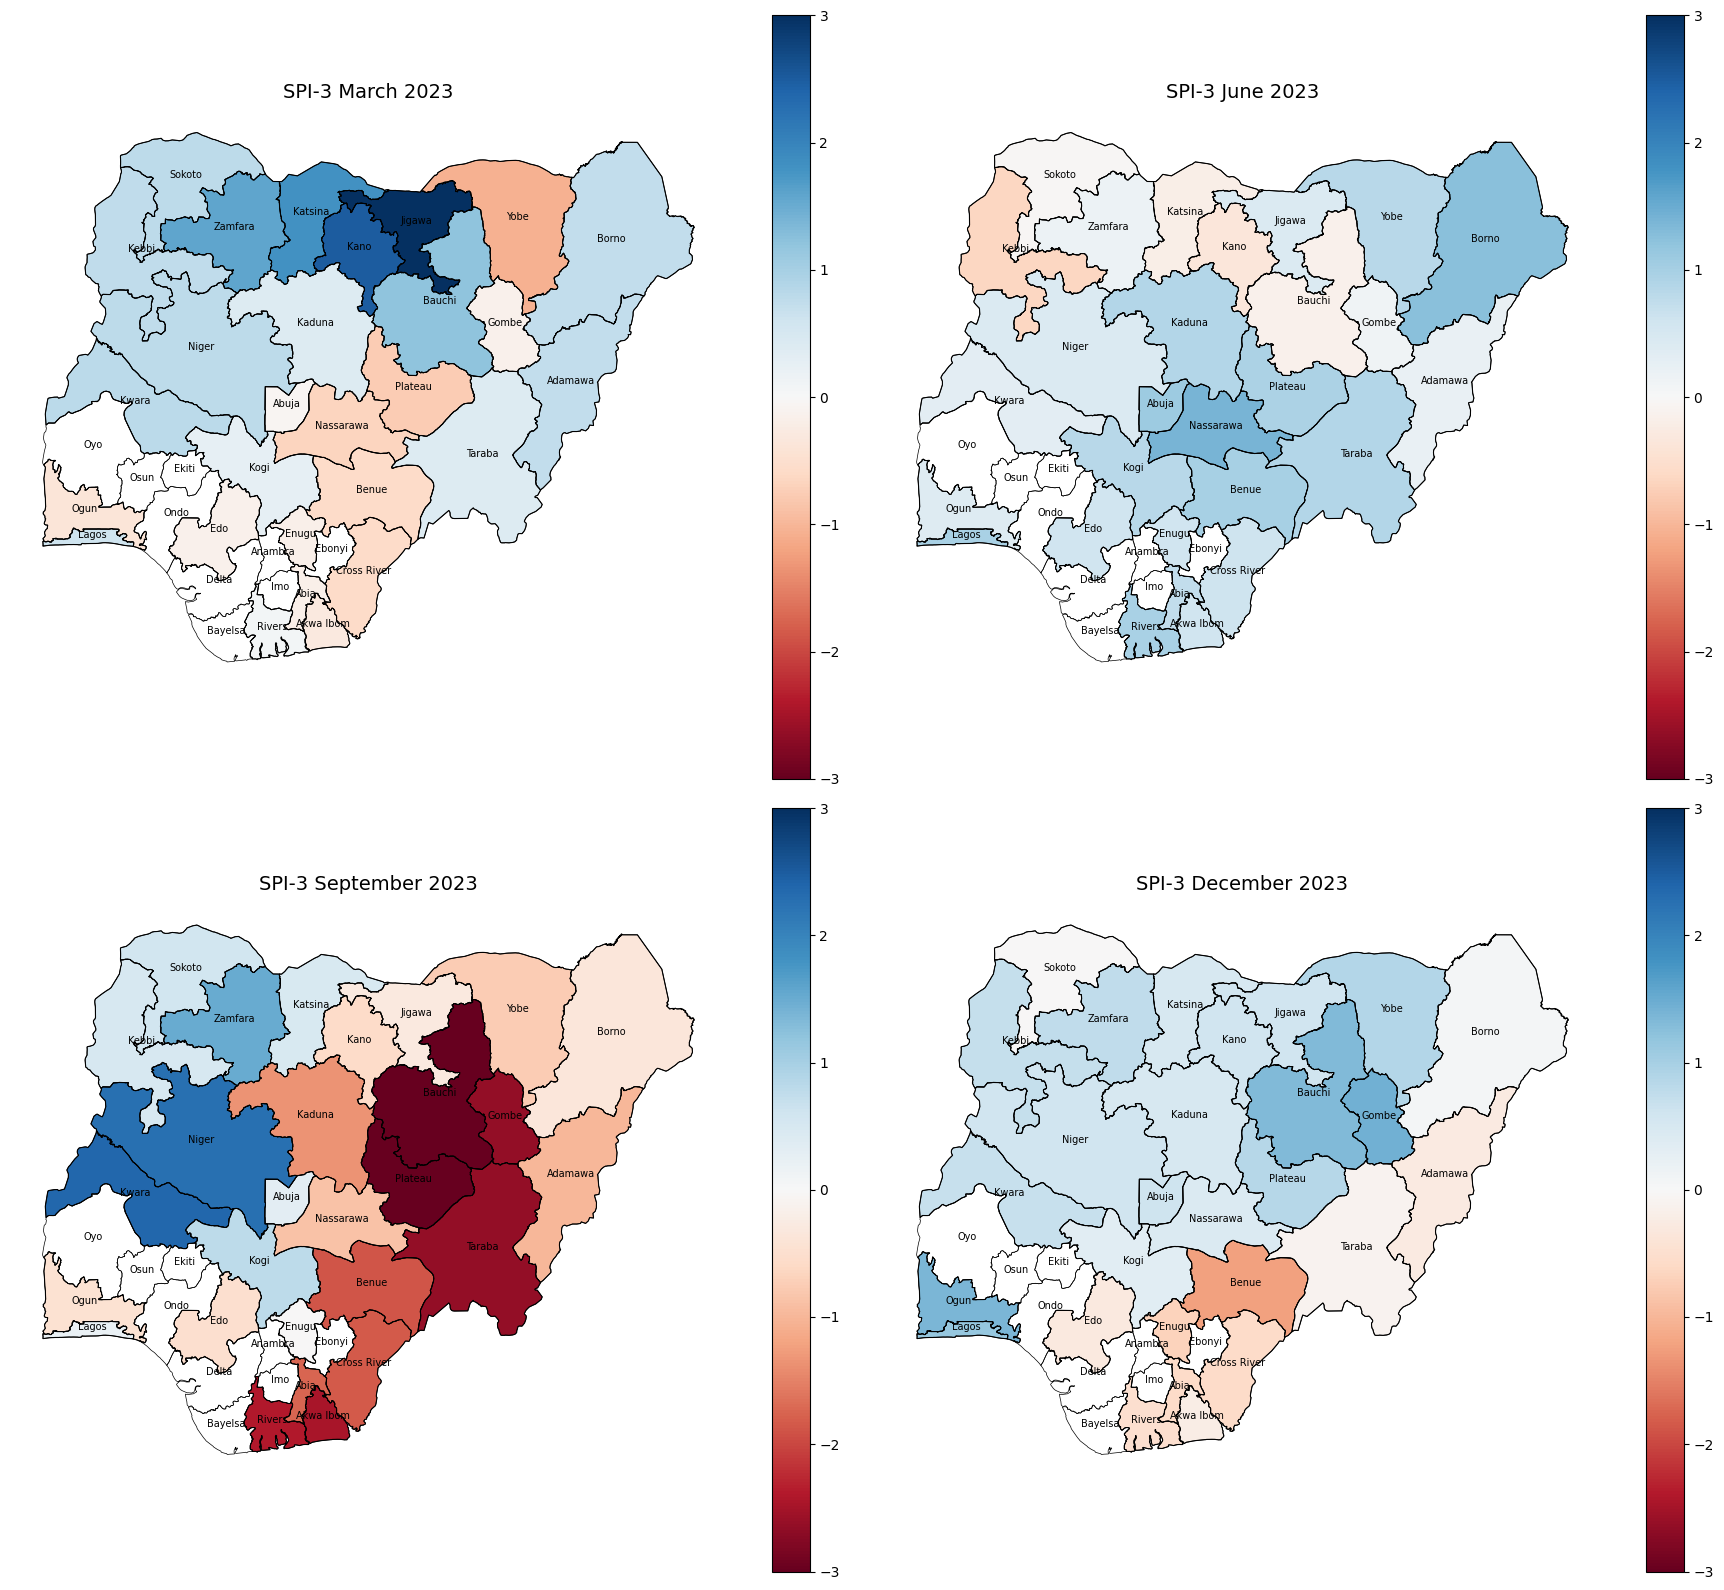

In [29]:
spi_2023 = data_merge[data_merge["year"] == 2023]

months = [3, 6, 9, 12]
month_names = ["March", "June", "September", "December"]

fig, axes = plt.subplots(2, 2, figsize=(18, 16))

vmin, vmax = -3, 3  # SPI standard

for ax, month, name in zip(axes.flatten(), months, month_names):
    # SPI-3 du mois
    spi_month = spi_2023[spi_2023["month"] == month]
    
    # Jointure avec la carte Admin1
    map_data = nigeria_adm1.merge(spi_month, left_on="shapeName", right_on="State")
    
    # Carte choroplèthe SPI-3
    map_data.plot(
        column="SPI_Cum3",
        cmap="RdBu",
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax,
        vmin=vmin,
        vmax=vmax
    )
    
    # Ajouter la frontière Nord/Centre/Sud en transparence
    nigeria_adm1.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Ajouter les noms des États
    for idx, row in nigeria_adm1.iterrows():
        ax.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                row["shapeName"],
                fontsize=7,
                ha='center')
    
    ax.set_title(f"SPI-3 {name} 2023", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

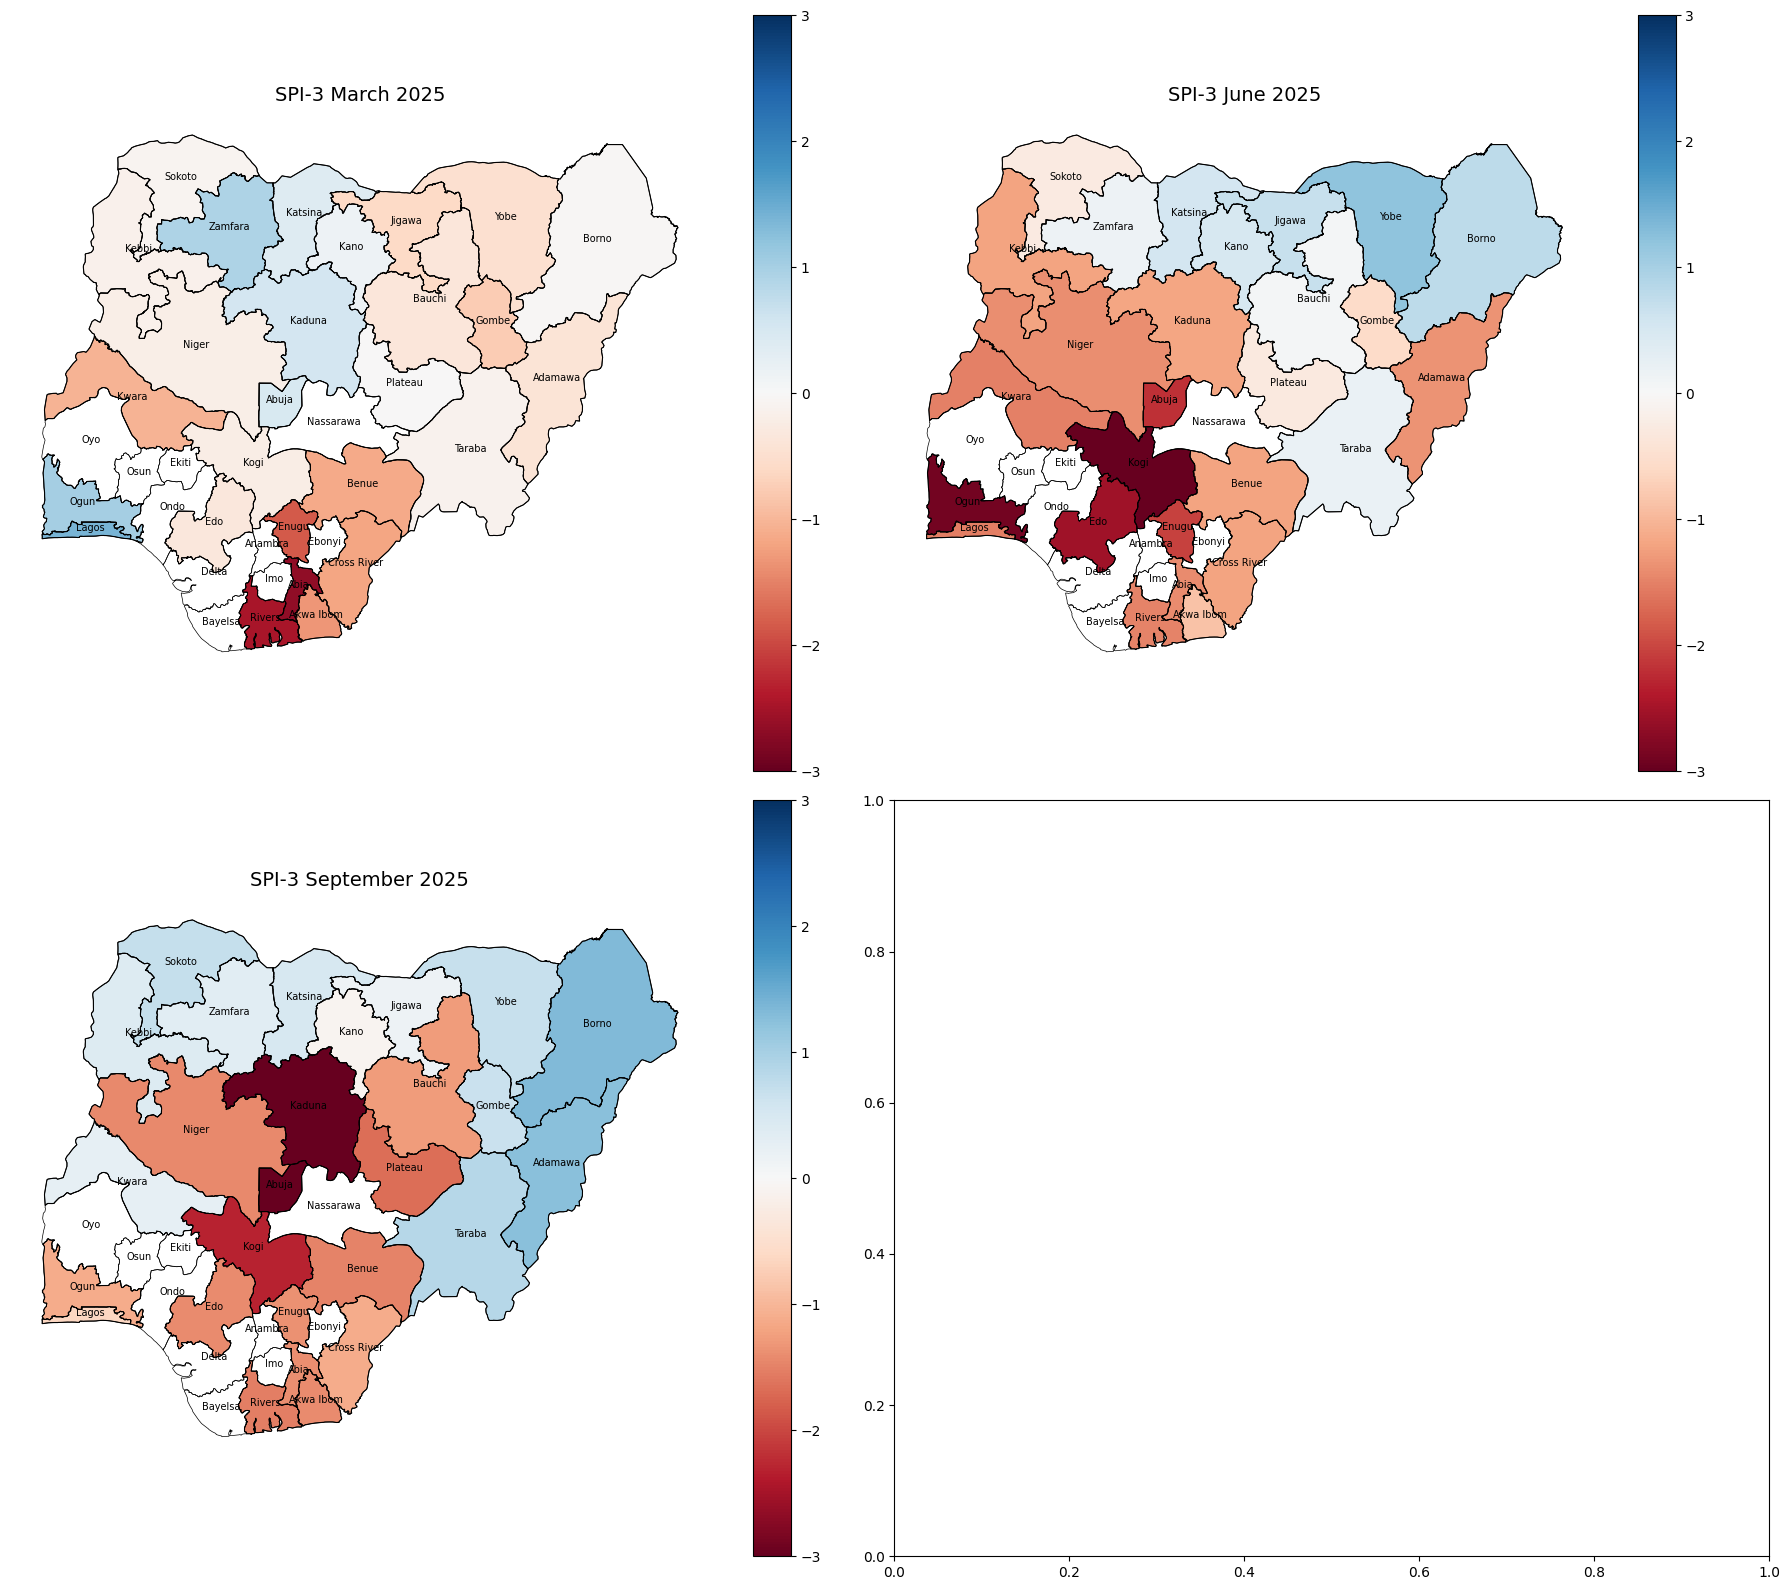

In [62]:
spi_2025 = data_merge[data_merge["year"] == 2025]
months = [3, 6, 9]
month_names = ["March", "June", "September"]
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

vmin, vmax = -3, 3  # SPI standard

for ax, month, name in zip(axes.flatten(), months, month_names):
    # SPI-3 du mois
    spi_month = spi_2025[spi_2025["month"] == month]
    
    # Jointure avec la carte Admin1
    map_data = nigeria_adm1.merge(spi_month, left_on="shapeName", right_on="State")
    
    # Carte choroplèthe SPI-3
    map_data.plot(
        column="SPI_Cum3",
        cmap="RdBu",
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax,
        vmin=vmin,
        vmax=vmax
    )
    
    # Ajouter la frontière Nord/Centre/Sud en transparence
    nigeria_adm1.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Ajouter les noms des États
    for idx, row in nigeria_adm1.iterrows():
        ax.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                row["shapeName"],
                fontsize=7,
                ha='center')
    
    ax.set_title(f"SPI-3 {name} 2025", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

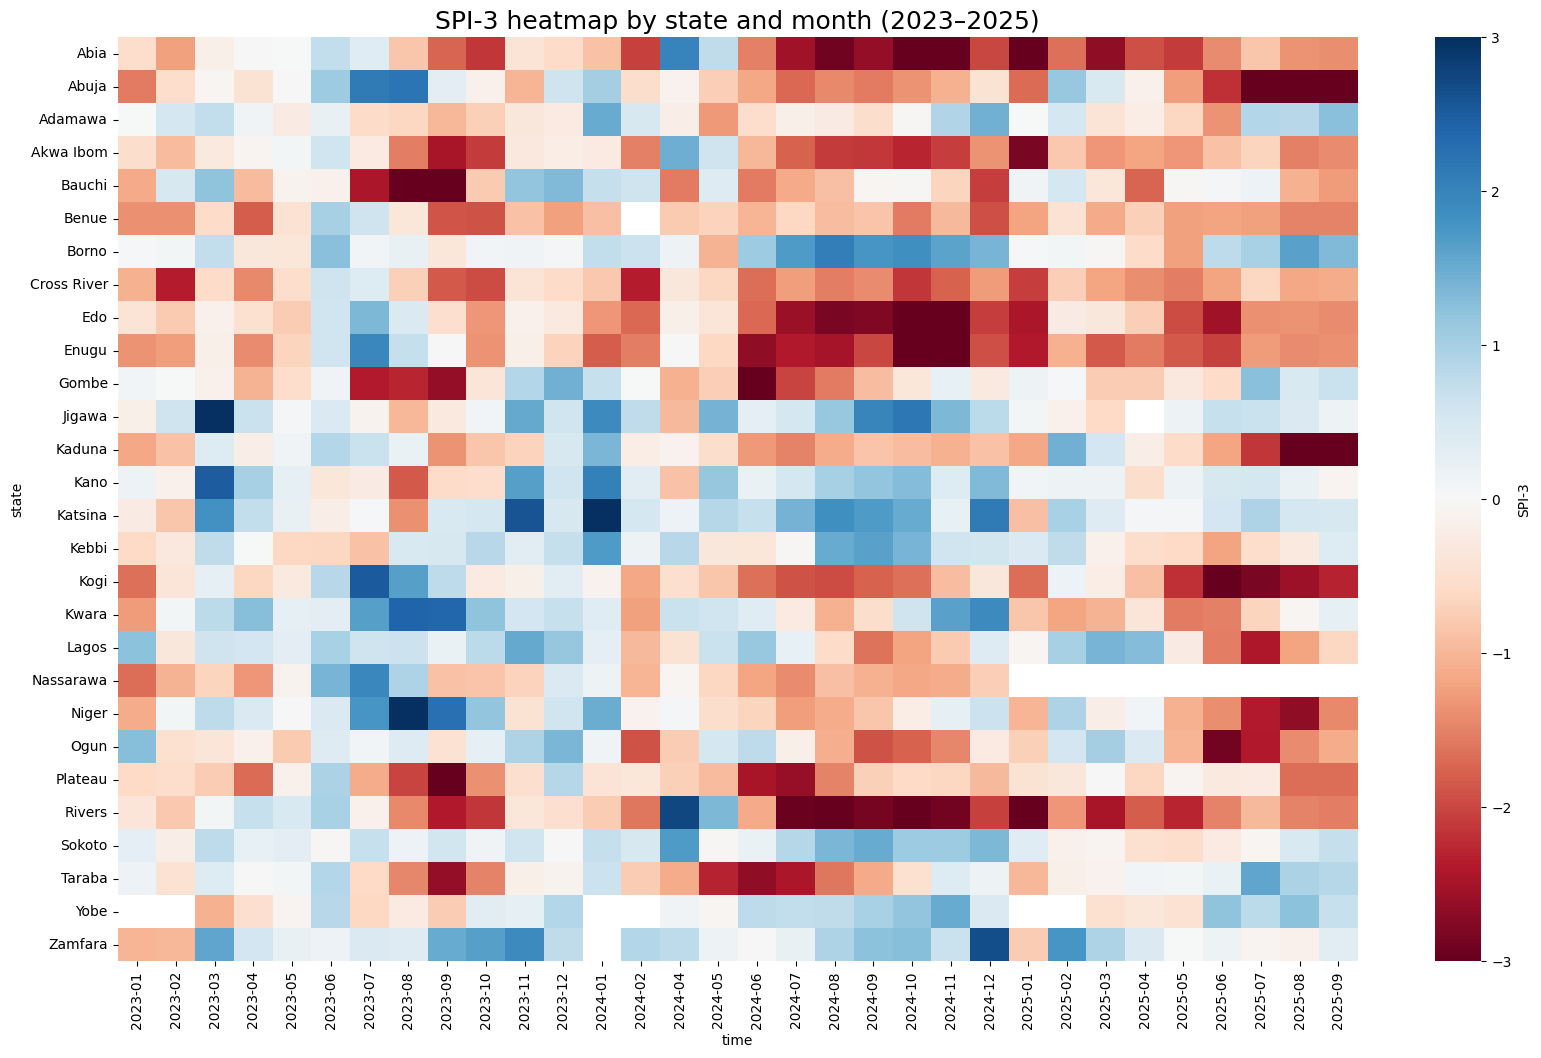

In [ ]:
data_merge["date"] = data_merge["year"].astype(str) + "-" + data_merge["month"].astype(str).str.zfill(2)

heatmap_data = data_merge.pivot_table(
    values="SPI_Cum3",
    index="State",
    columns="date"
)

plt.figure(figsize=(20, 12))

sns.heatmap(
    heatmap_data,
    cmap="RdBu",   
    center=0,
    vmin=-3,
    vmax=3,
    cbar_kws={"label": "SPI-3"}
)

plt.title("SPI-3 heatmap by state and month (2023–2025)", fontsize=18)
plt.xlabel("time")
plt.ylabel("state")

plt.show()


SPI6 Representation

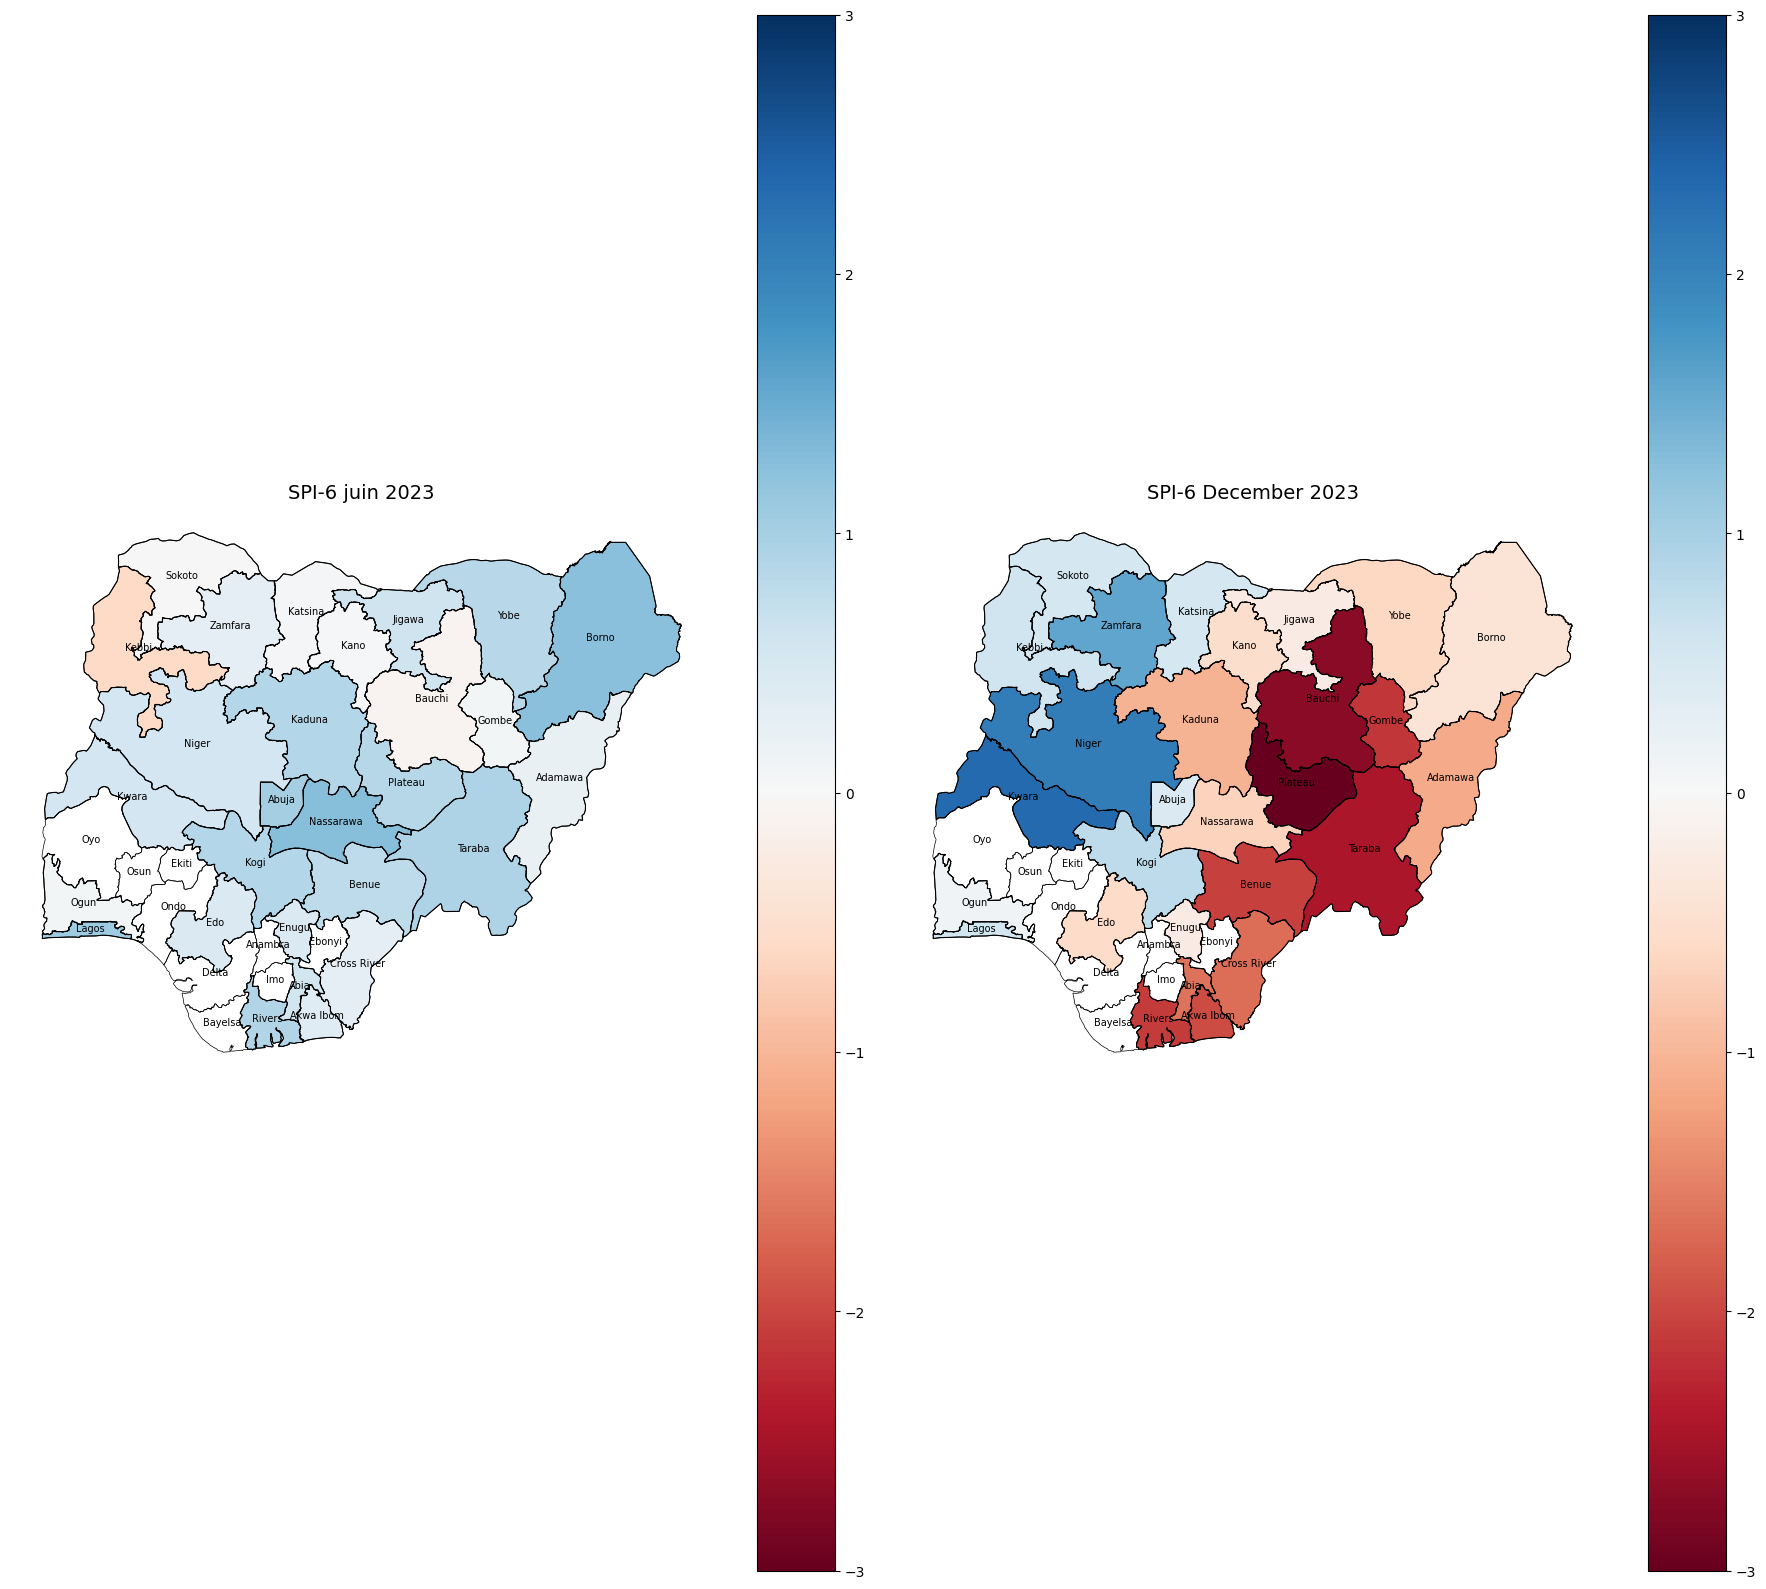

In [70]:
spi6_2023 = data_merge[data_merge["year"] == 2023]

months = [6,12]
month_names = ["juin","December"]

fig, axes = plt.subplots(1, 2, figsize=(18, 16))

vmin, vmax = -3, 3  # SPI standard

for ax, month, name in zip(axes.flatten(), months, month_names):
    # SPI-3 du mois
    spi_month = spi6_2023[spi6_2023["month"] == month]
    
    # Jointure avec la carte Admin1
    map_data = nigeria_adm1.merge(spi_month, left_on="shapeName", right_on="State")
    
    # Carte choroplèthe SPI-3
    map_data.plot(
        column="SPI_Cum6",
        cmap="RdBu",
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax,
        vmin=vmin,
        vmax=vmax
    )
    
    # Ajouter la frontière Nord/Centre/Sud en transparence
    nigeria_adm1.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Ajouter les noms des États
    for idx, row in nigeria_adm1.iterrows():
        ax.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                row["shapeName"],
                fontsize=7,
                ha='center')
    
    ax.set_title(f"SPI-6 {name} 2023", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

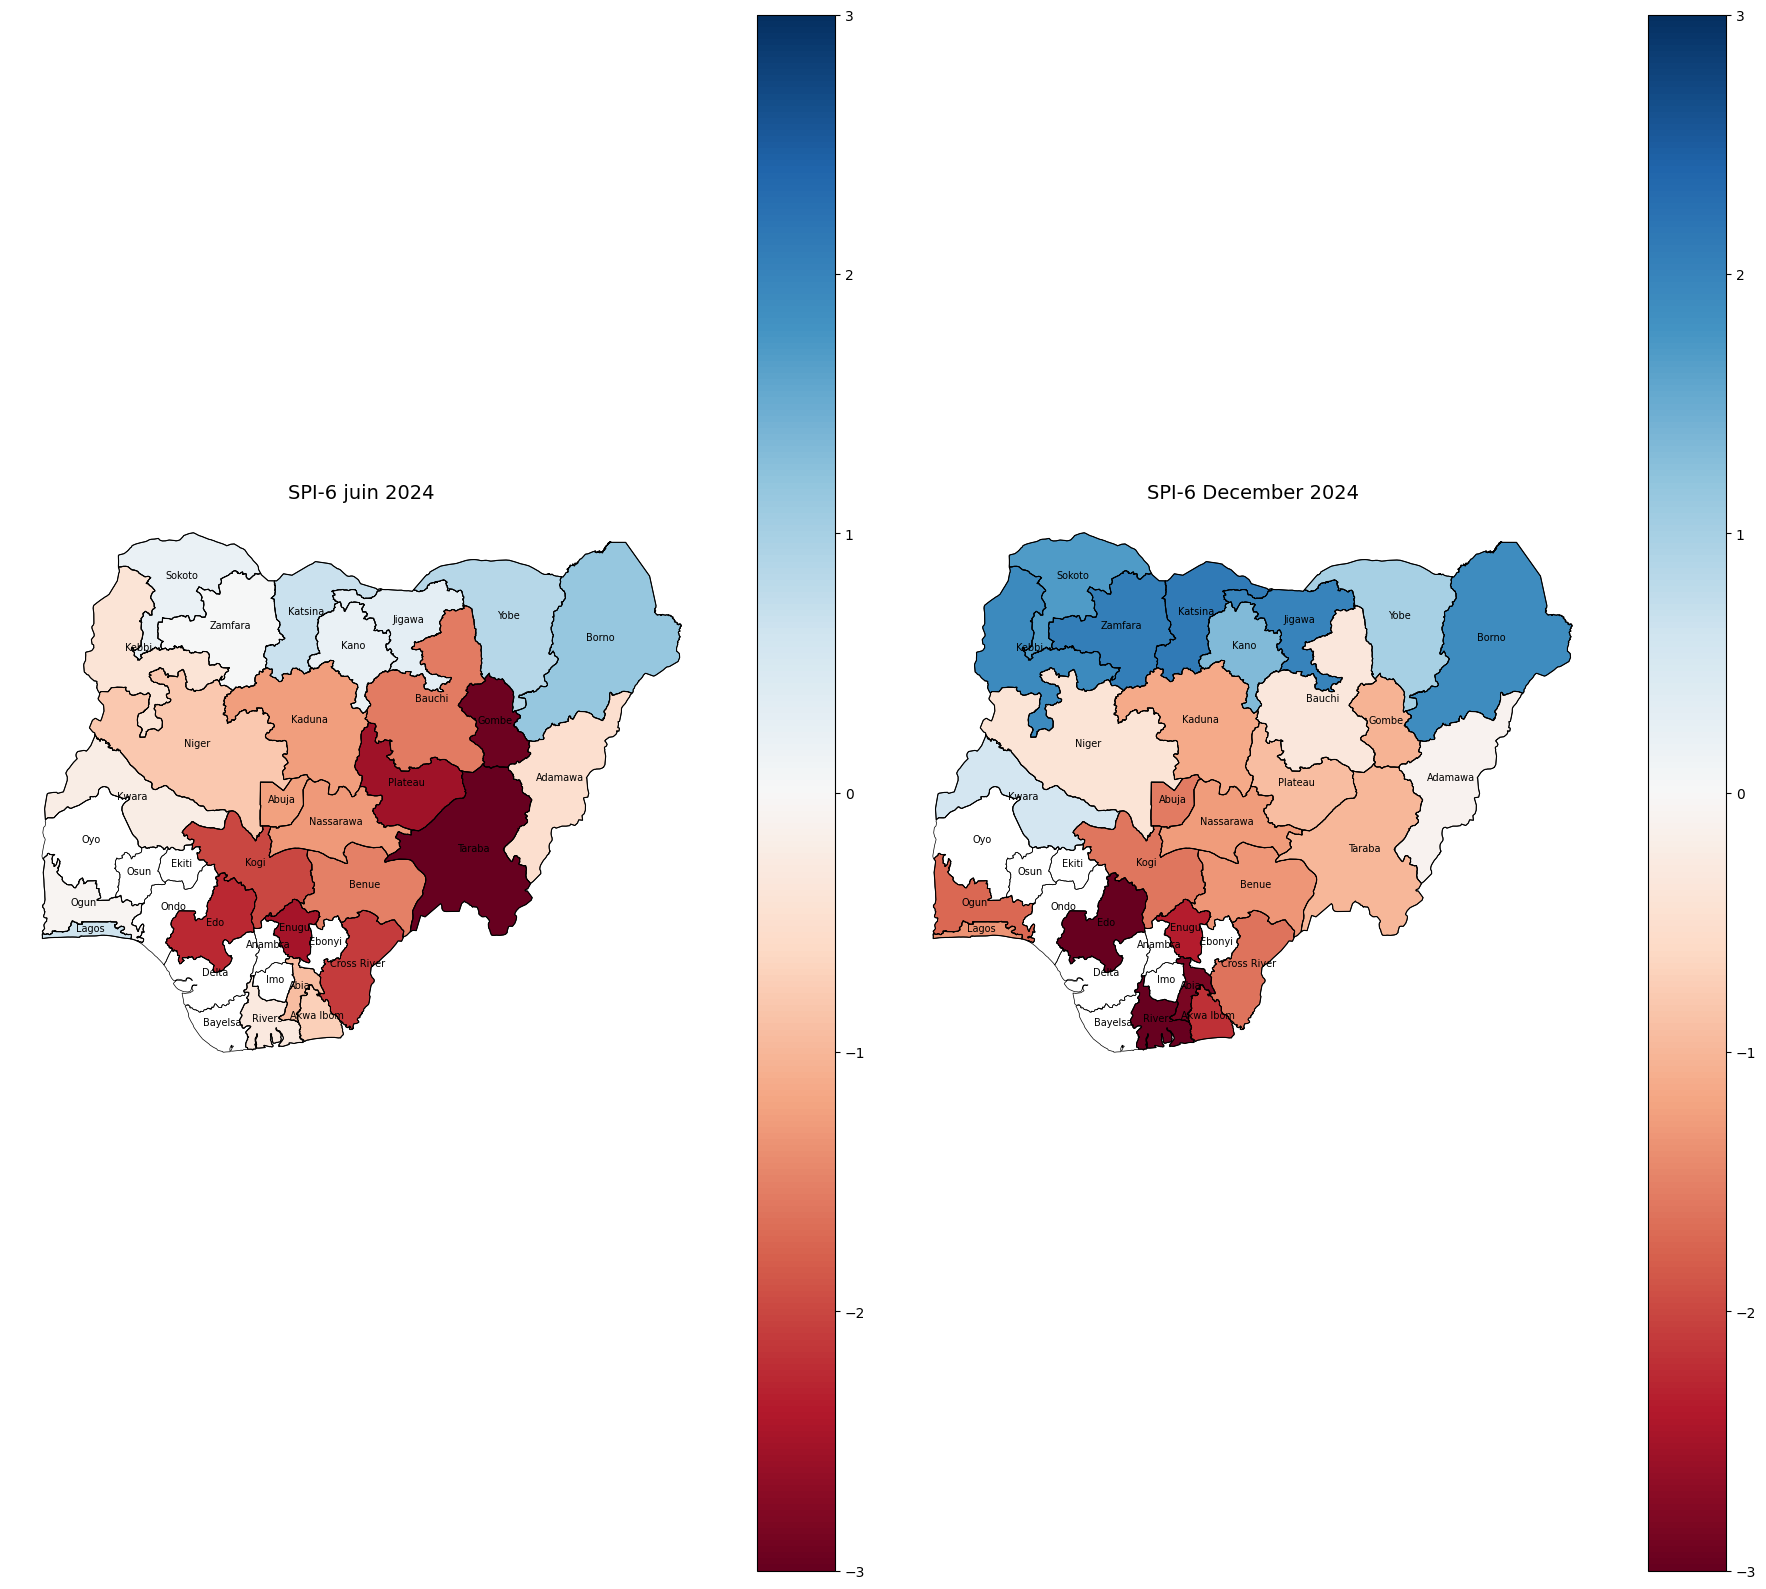

In [72]:
spi6_2024 = data_merge[data_merge["year"] == 2024]

months = [6,12]
month_names = ["juin","December"]

fig, axes = plt.subplots(1, 2, figsize=(18, 16))

vmin, vmax = -3, 3  # SPI standard

for ax, month, name in zip(axes.flatten(), months, month_names):
    # SPI-3 du mois
    spi_month = spi6_2024[spi6_2024["month"] == month]
    
    # Jointure avec la carte Admin1
    map_data = nigeria_adm1.merge(spi_month, left_on="shapeName", right_on="State")
    
    # Carte choroplèthe SPI-3
    map_data.plot(
        column="SPI_Cum6",
        cmap="RdBu",
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax,
        vmin=vmin,
        vmax=vmax
    )
    
    # Ajouter la frontière Nord/Centre/Sud en transparence
    nigeria_adm1.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Ajouter les noms des États
    for idx, row in nigeria_adm1.iterrows():
        ax.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                row["shapeName"],
                fontsize=7,
                ha='center')
    
    ax.set_title(f"SPI-6 {name} 2024", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

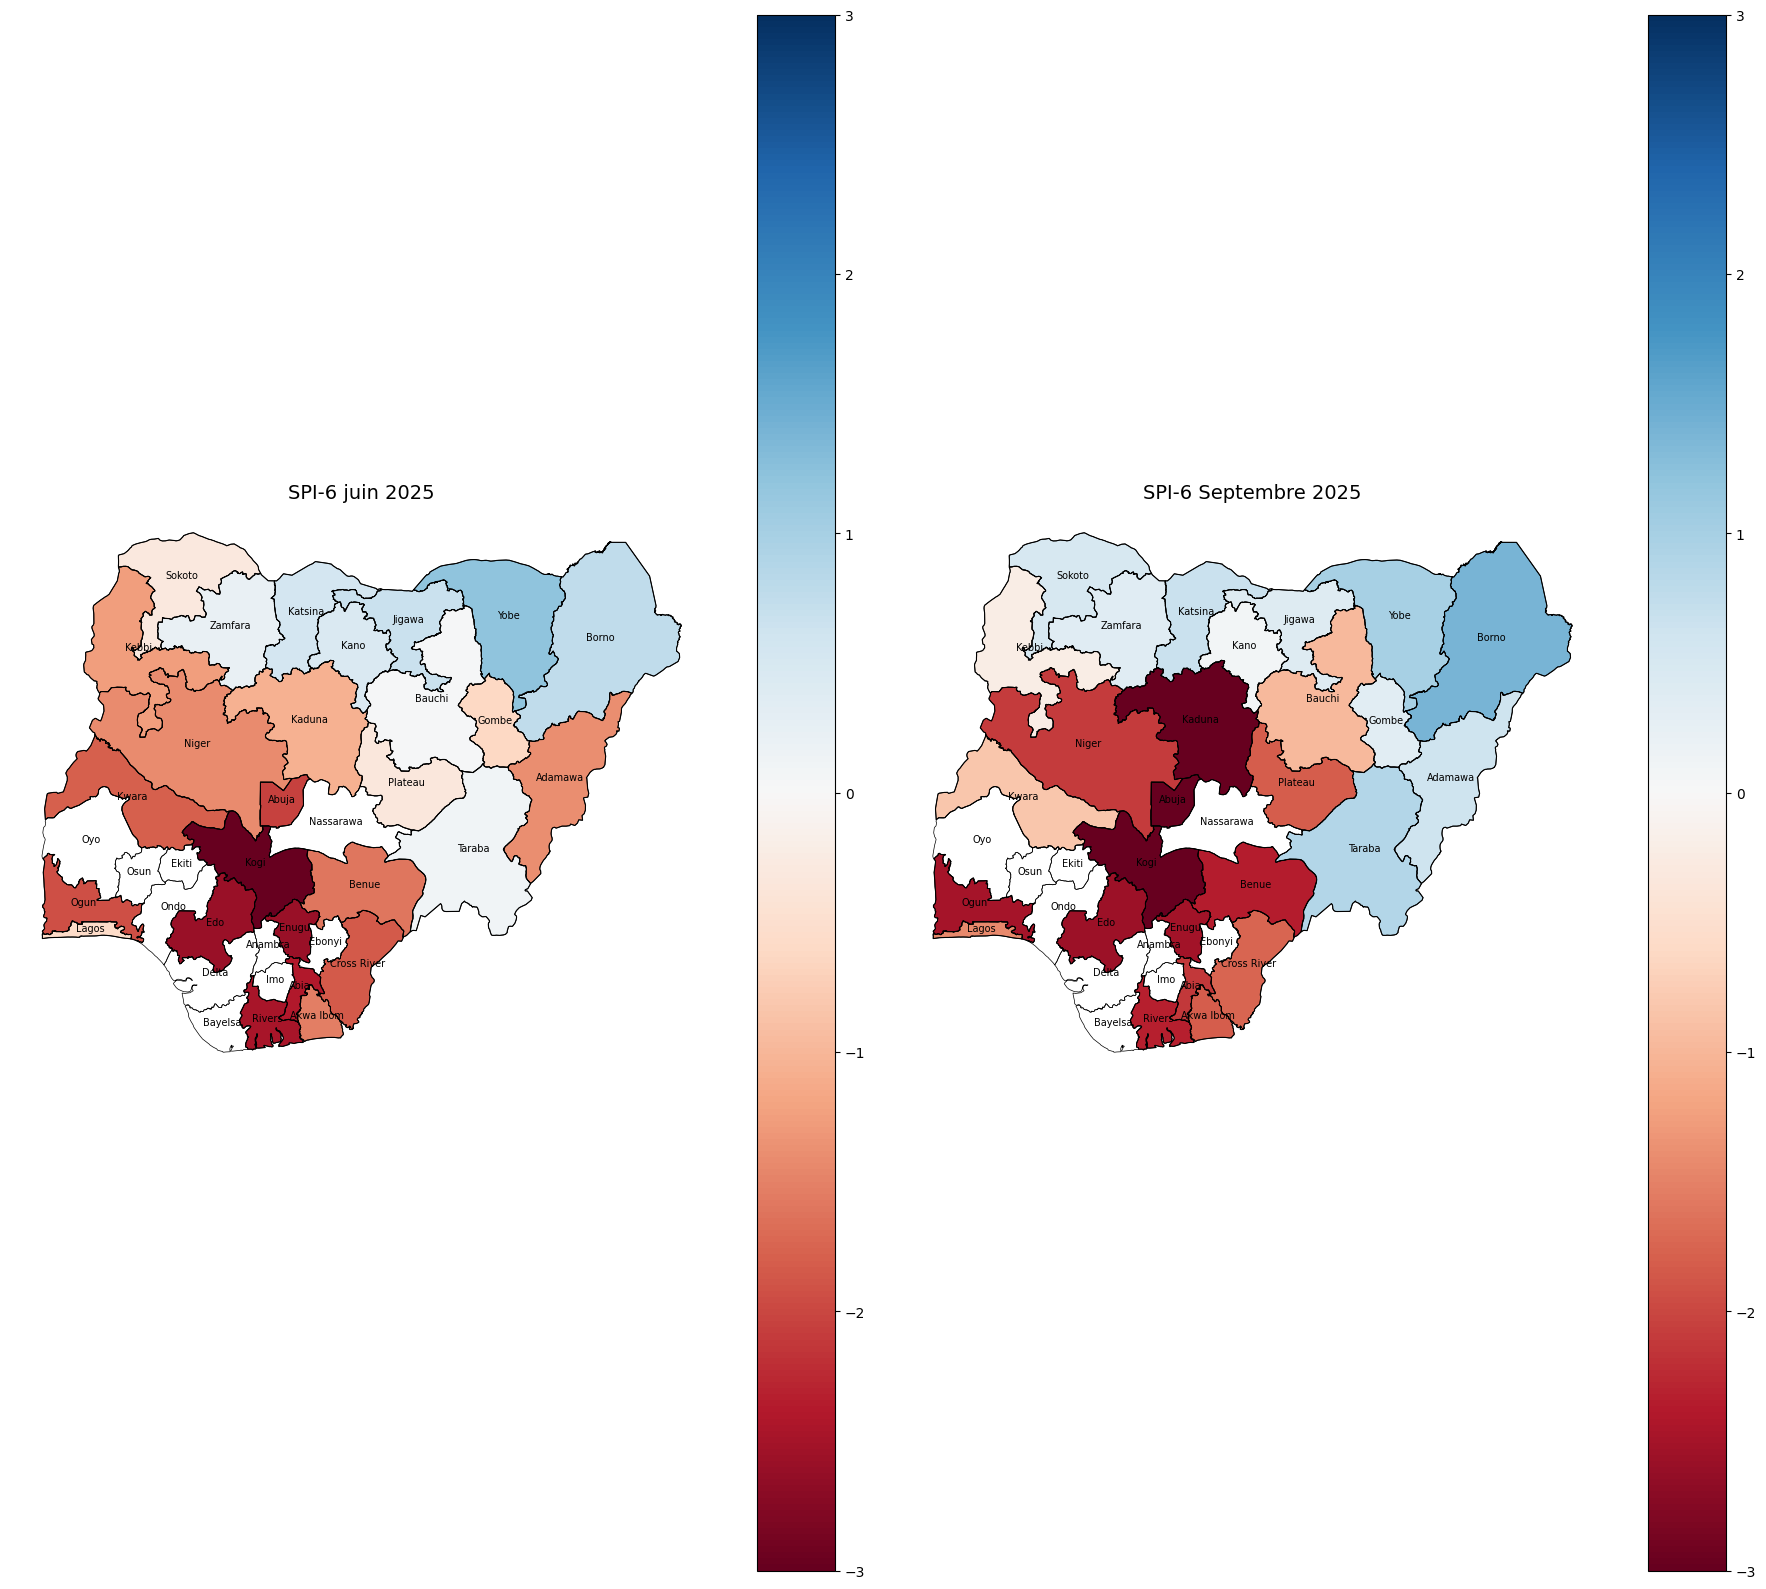

In [74]:
spi6_2025 = data_merge[data_merge["year"] == 2025]

months = [6,9]
month_names = ["juin","Septembre"]

fig, axes = plt.subplots(1, 2, figsize=(18, 16))

vmin, vmax = -3, 3  # SPI standard

for ax, month, name in zip(axes.flatten(), months, month_names):
    # SPI-3 du mois
    spi_month = spi6_2025[spi6_2025["month"] == month]
    
    # Jointure avec la carte Admin1
    map_data = nigeria_adm1.merge(spi_month, left_on="shapeName", right_on="State")
    
    # Carte choroplèthe SPI-3
    map_data.plot(
        column="SPI_Cum6",
        cmap="RdBu",
        legend=True,
        edgecolor="black",
        linewidth=0.8,
        ax=ax,
        vmin=vmin,
        vmax=vmax
    )
    
    # Ajouter la frontière Nord/Centre/Sud en transparence
    nigeria_adm1.boundary.plot(ax=ax, color="black", linewidth=0.5)
    
    # Ajouter les noms des États
    for idx, row in nigeria_adm1.iterrows():
        ax.text(row.geometry.centroid.x,
                row.geometry.centroid.y,
                row["shapeName"],
                fontsize=7,
                ha='center')
    
    ax.set_title(f"SPI-6 {name} 2025", fontsize=14)
    ax.axis("off")

plt.tight_layout()
plt.show()

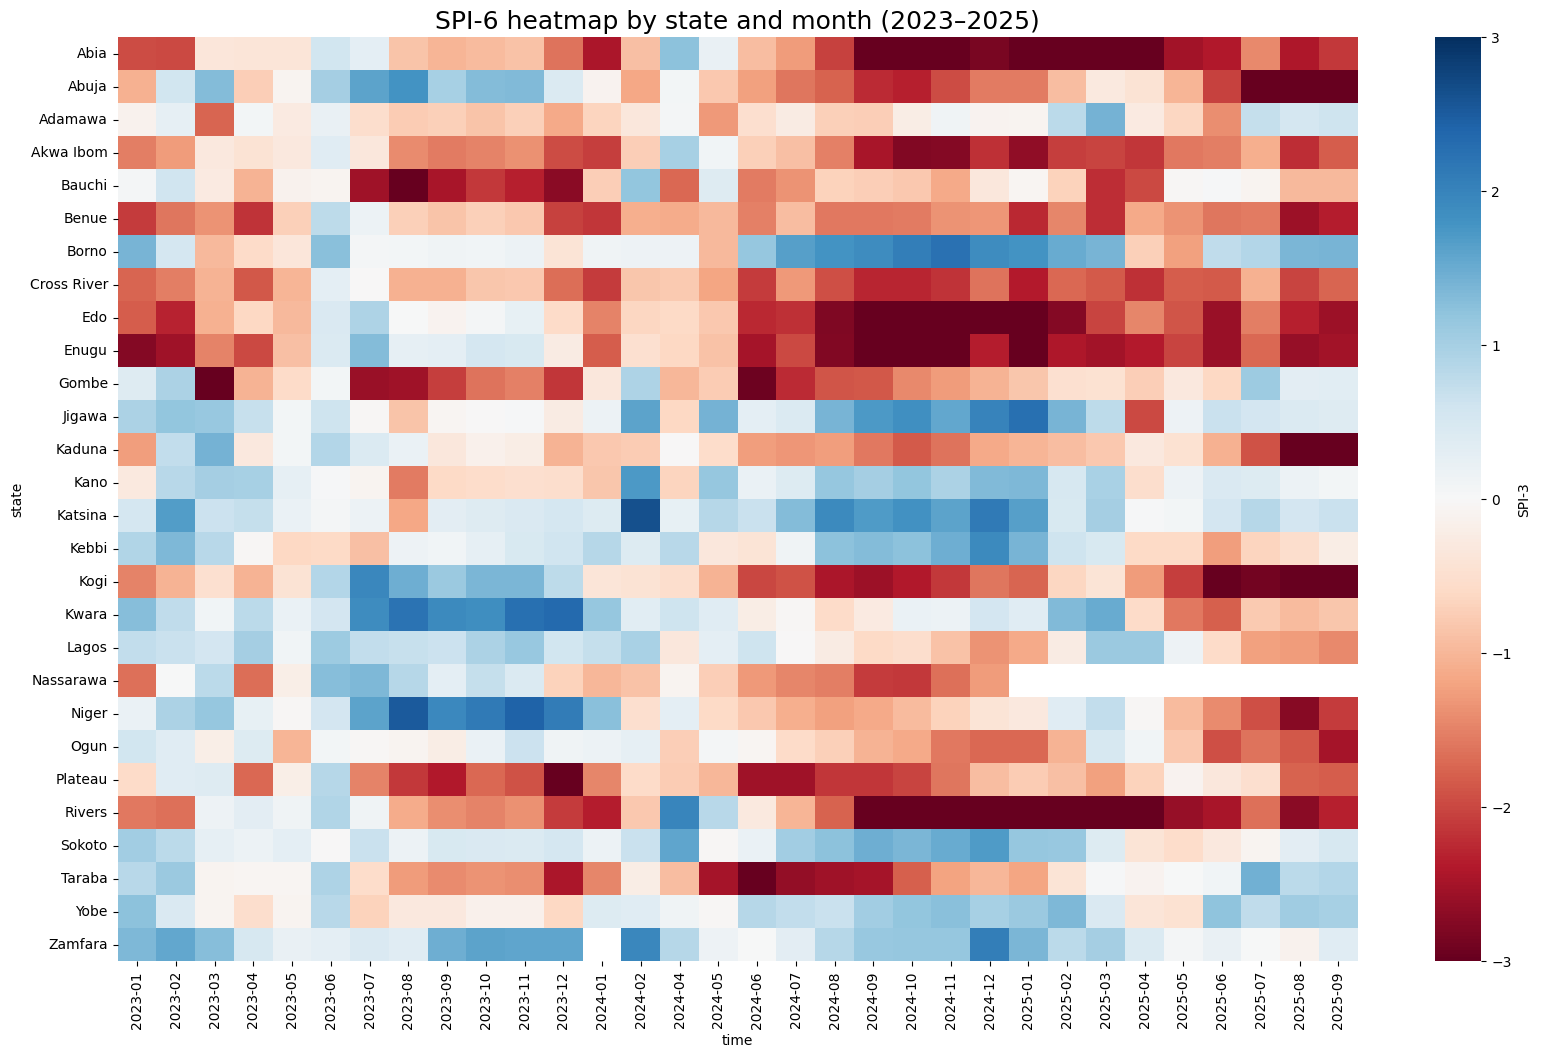

In [88]:
data_merge["date"] = data_merge["year"].astype(str) + "-" + data_merge["month"].astype(str).str.zfill(2)

heatmap_data = data_merge.pivot_table(
    values="SPI_Cum6",
    index="State",
    columns="date"
)

plt.figure(figsize=(20, 12))

sns.heatmap(
    heatmap_data,
    cmap="RdBu",   # rouge sec / bleu humide
    center=0,
    vmin=-3,
    vmax=3,
    cbar_kws={"label": "SPI-3"}
)

plt.title("SPI-6 heatmap by state and month (2023–2025)", fontsize=18)
plt.xlabel("time")
plt.ylabel("state")

plt.show()


Number of dry months

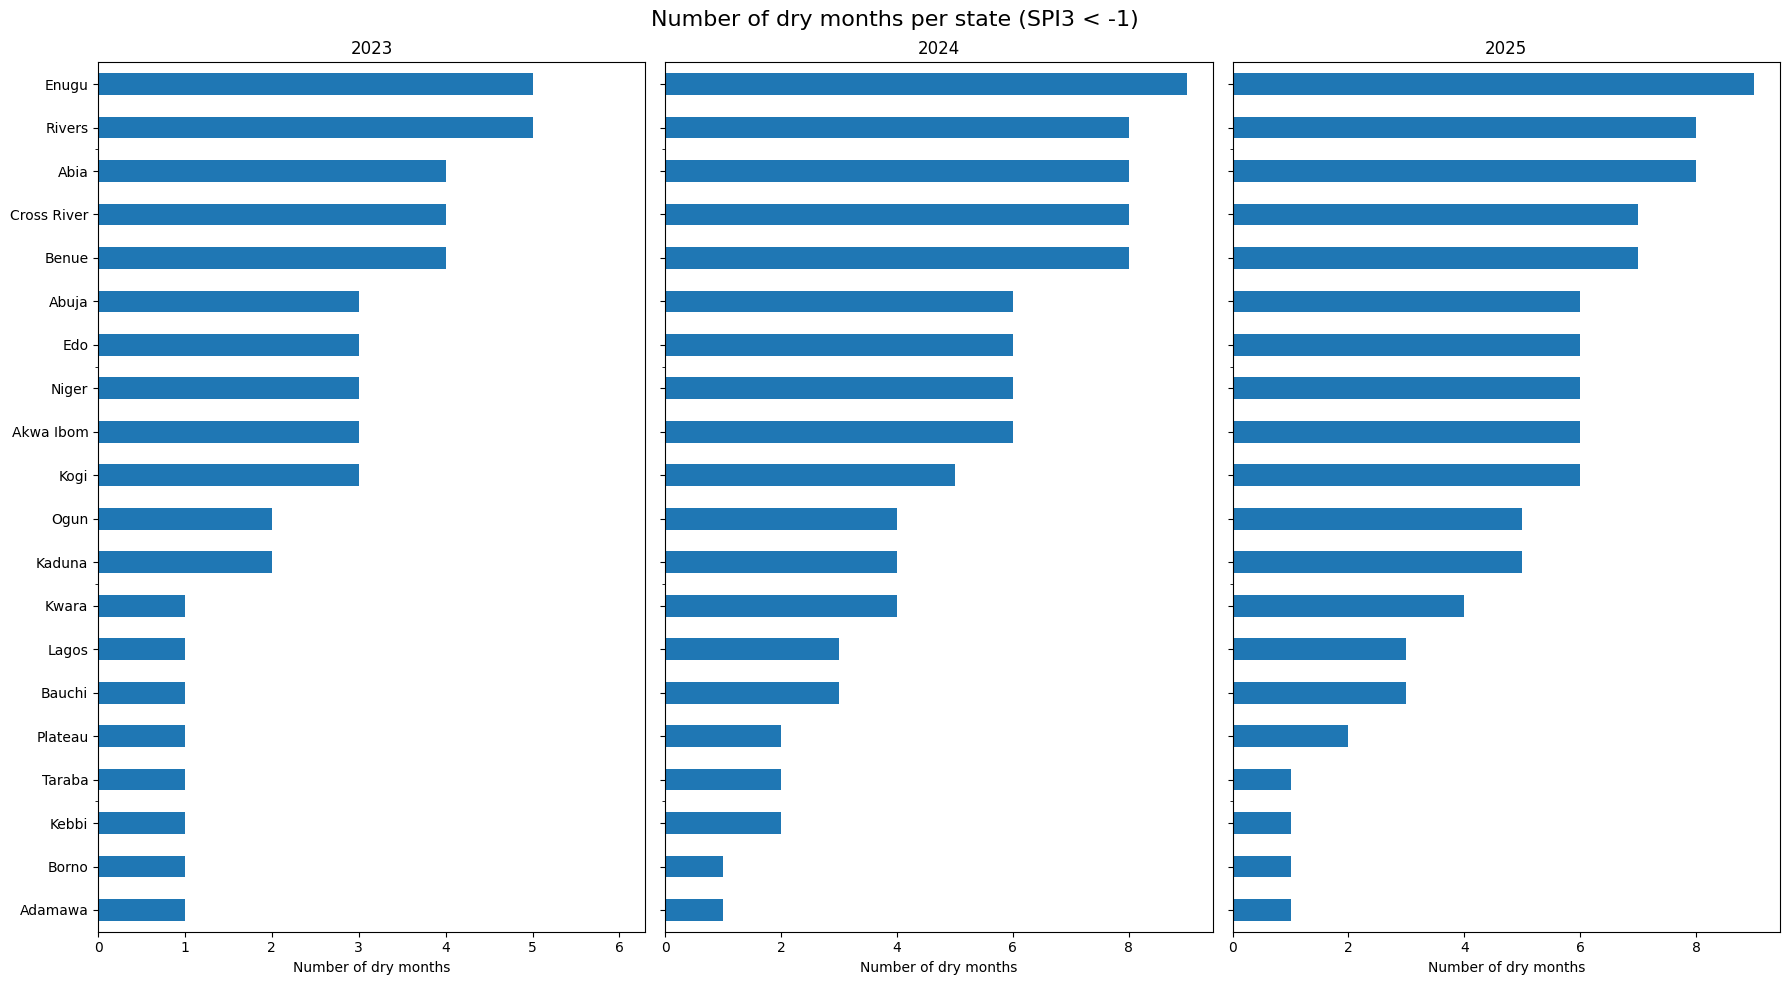

In [85]:
def plot_dry_months_by_state(ax, data, year, threshold=-1):
    
    # Filtrer mois secs de l'année
    dry_months = data[
        (data["SPI_Cum3"] < threshold) &
        (data["year"] == year)
    ]
    
    # Compter nb de mois secs par État
    dry_counts = (
        dry_months
        .groupby("State")
        .size()
        .sort_values()
    )
    
    # Plot dans l'axe donné
    dry_counts.plot(kind="barh", ax=ax)
    
    ax.set_title(f"{year}")
    ax.set_xlabel("Number of dry months")
    ax.set_ylabel("")

# --- Figure mosaïque ---
fig, axes = plt.subplots(1, 3, figsize=(18, 10), sharey=True)

years = [2023, 2024, 2025]

for ax, y in zip(axes, years):
    plot_dry_months_by_state(ax, data_merge, y)

fig.suptitle("Number of dry months per state (SPI3 < -1)", fontsize=16)

plt.tight_layout()
plt.show()